# Week 1: 
I am going to buy 10 shares from 3 different stocks of different industries. I chose the companies Tesla, Microsoft, and Costco. I chose these because I knew what they were about and seem to be doing well based off of research of different stocks.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

symbols = ['TSLA', 'COST', 'MSFT']
start = '2015-01-01'
end = '2021-11-18'
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [38]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,TSLA,COST,MSFT
Date,,,
2015-01-02,43.862000,119.715324,41.193836
2015-01-05,42.018002,118.354309,40.815029
2015-01-06,42.256001,119.918228,40.215965
2015-01-07,42.189999,122.006401,40.726929
2015-01-08,42.124001,123.054619,41.925034


In [39]:
df.tail()

,TSLA,COST,MSFT
Date,,,
2021-11-11,1063.510010,512.179993,331.822906
2021-11-12,1033.420044,517.169983,336.105103
2021-11-15,1013.390015,519.890015,335.456299
2021-11-16,1054.729980,526.719971,338.890015
2021-11-17,1089.010010,526.289978,339.119995


In [40]:
df.describe()

,TSLA,COST,MSFT
count,1733.000000,1733.000000,1733.000000
mean,176.683940,224.103003,117.789988
std,246.228532,96.840973,76.320492
min,28.733999,116.824768,35.590919
25%,46.462002,141.932190,53.251270
50%,61.222000,188.665054,95.003159
75%,126.846001,290.482086,162.621094
max,1229.910034,526.719971,339.119995


## Stock Return

([<matplotlib.axis.YTick at 0x120504f10>,
 [Text(0, 0, 'TSLA'), Text(0, 1, 'COST'), Text(0, 2, 'MSFT')])

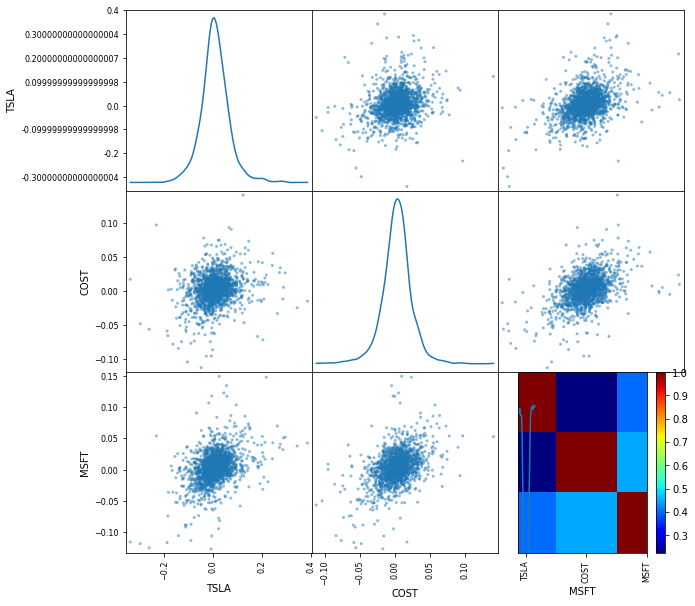

In [41]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='jet', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0, 0.5, 'Standard Deviations')

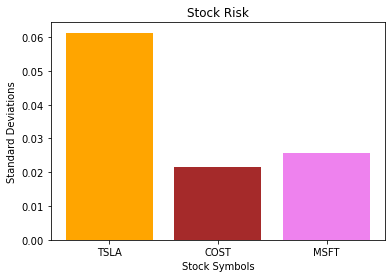

In [42]:
plt.bar(rets.columns, rets.std(), color=['orange', 'brown', 'violet'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0, 0.5, 'Returns')

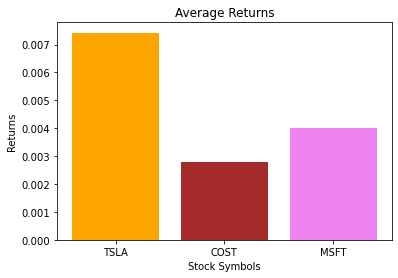

In [43]:
plt.bar(rets.columns, rets.mean(), color=['orange', 'brown', 'violet'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

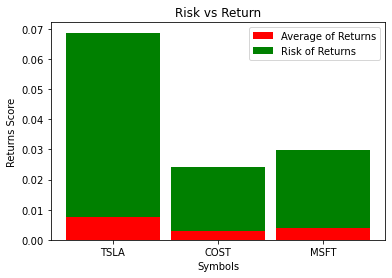

In [44]:
symbols = ['TSLA', 'COST', 'MSFT']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.9, label='Average of Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Risk of Returns', color='g', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

## Risk vs Expected Return

In [45]:
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
tables = pd.DataFrame(data=d)
tables   

,Risk,Expected Returns
TSLA,0.061305,0.007423
COST,0.021477,0.002801
MSFT,0.025676,0.004004


## Trade Executions: 

Starting funds as of 11/19: $250,000

In [54]:
#Week 1 Funds
week1start = 250000.00
week2end = 250342.05


#Week 1 starting funds
print("Starting funds as of 11/19: ${}".format(week1start))

#Week 1 ending funds
print("Ending funds as of 11/19: ${}".format(week2end))

# Percent gain/loss
percentDiffrence = ((week1start - week2end)/((week1start + week2end)/2))*-100
print("Percent gain/loss was: +{}%".format(percentDiffrence))

#Profit
gain_loss = week2end - week1start
print("Profit as of 11/19: ${}".format(gain_loss))

Starting funds as of 11/19: $250000.0
Ending funds as of 11/19: $250342.05
Percent gain/loss was: +0.1367264654249981%
Profit as of 11/19: $342.04999999998836


# Week 2:

In [5]:
!pip install datapackage
!pip install pandas
!pip install numpy
!pip install yahoo-finance
!pip install matplotlib

     |████████████████████████████████| 85 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 68 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 45 kB 6.1 MB/s eta 0:00:011
     |████████████████████████████████| 52 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 131 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.2 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 7.1 MB/s eta 0:00:011
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7382 sha256=010f31d051d96c7db4baec1c1e9fbf358b59b363d0981d02521c8a45c00cf11e
  Stored in directory: /Users/abbiechoi77/Library/Caches/pip/wheels/31/25/a5/d9b4b59636e1b9f183b7e1022e7be5c51141717b92398d7f9e
Successfully built linear-tsv
     |████████████████████████████████| 74 kB 1.7 MB/s eta 0:00:01
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any

In [6]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
%matplotlib inline

In [14]:
start = "2020-01-01"
end = '2021-11-25'
#Fortune Companies
Anthem = yf.download('ANTM',start,end)
Comcast = yf.download('CMCSA',start,end)
BankOfAmerica = yf.download('BAC',start,end)
Target = yf.download('TGT',start,end)
HP = yf.download('HPE',start,end)
IBM = yf.download('IBM',start,end)
Cisco = yf.download('CSCO',start,end)
Merck = yf.download('MRK',start,end)
AbbVie = yf.download('ABBV',start,end)
Progressive = yf.download('PGR',start,end)
Nationwide = yf.download('NFS',start,end)
USAA = yf.download('USISX',start,end)
CapitalOne = yf.download('COF',start,end)

#Personal Picks
HASBRO = yf.download('HAS',start,end)
AmericanExpress = yf.download('AXP',start,end)
Intel = yf.download('INTC',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

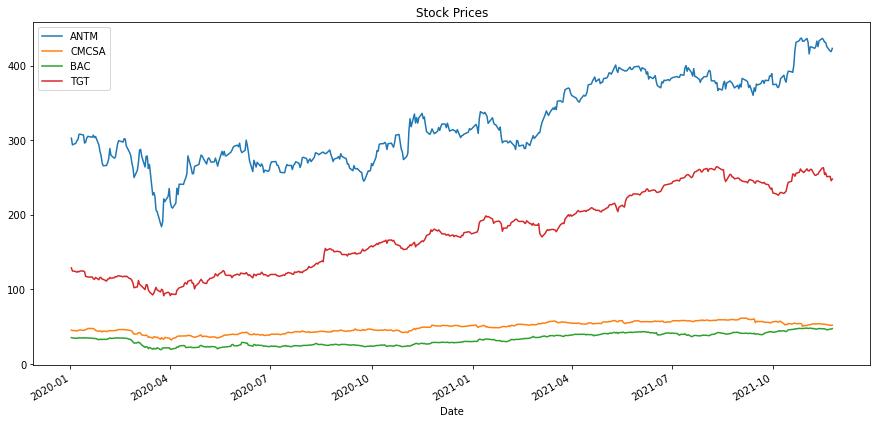

In [8]:
# Plot 1
Anthem['Open'].plot(label = 'ANTM', figsize = (15,7))
Comcast['Open'].plot(label = "CMCSA")
BankOfAmerica['Open'].plot(label = 'BAC')
Target['Open'].plot(label = "TGT")

plt.title('Stock Prices')
plt.legend()

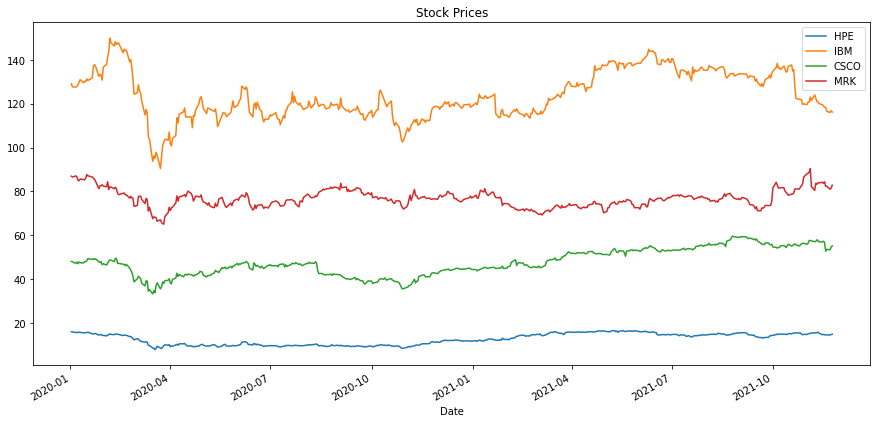

In [11]:
# Plot 2
HP['Open'].plot(label = 'HPE', figsize = (15,7))
IBM['Open'].plot(label = "IBM")
Cisco['Open'].plot(label = 'CSCO')
Merck['Open'].plot(label = "MRK")

plt.title('Stock Prices')
plt.legend()

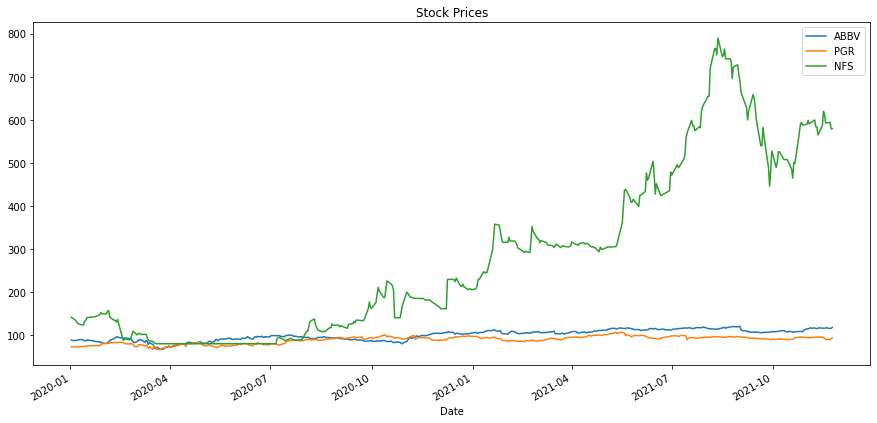

In [16]:
# Plot 3
AbbVie['Open'].plot(label = 'ABBV', figsize = (15,7))
Progressive['Open'].plot(label = "PGR")
Nationwide['Open'].plot(label = 'NFS')

plt.title('Stock Prices')
plt.legend()

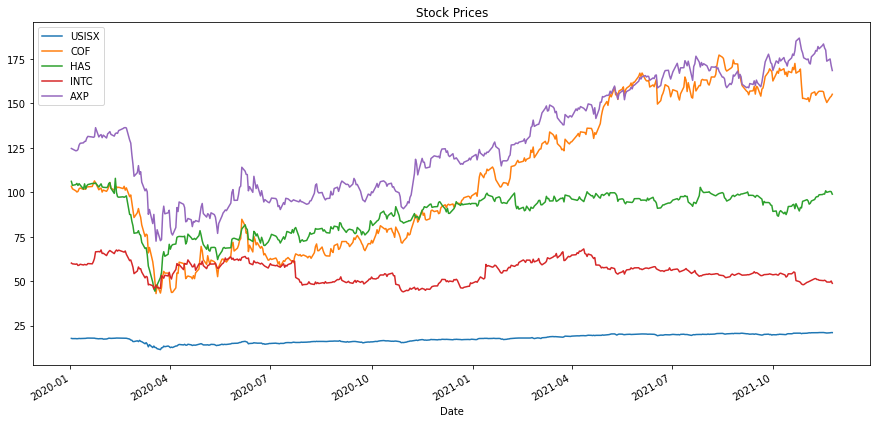

In [15]:
# Plot 4
USAA['Open'].plot(label = "USISX", figsize = (15,7))
CapitalOne['Open'].plot(label = 'COF')
HASBRO['Open'].plot(label = "HAS")
Intel['Open'].plot(label = 'INTC')
AmericanExpress['Open'].plot(label = 'AXP')

plt.title('Stock Prices')
plt.legend()

<AxesSubplot:xlabel='Date'>

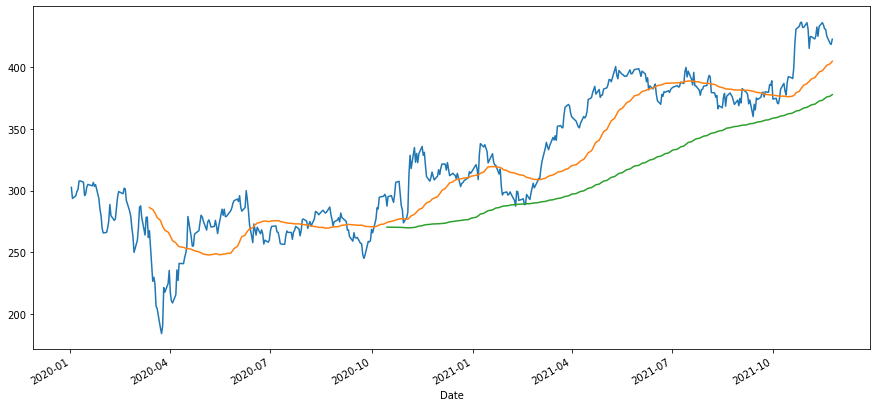

In [26]:
Anthem['MA50'] = Anthem['Open'].rolling(50).mean()
Anthem['MA200'] = Anthem['Open'].rolling(200).mean()
Anthem['Open'].plot(figsize = (15,7))
Anthem['MA50'].plot()
Anthem['MA200'].plot()

<AxesSubplot:xlabel='Date'>

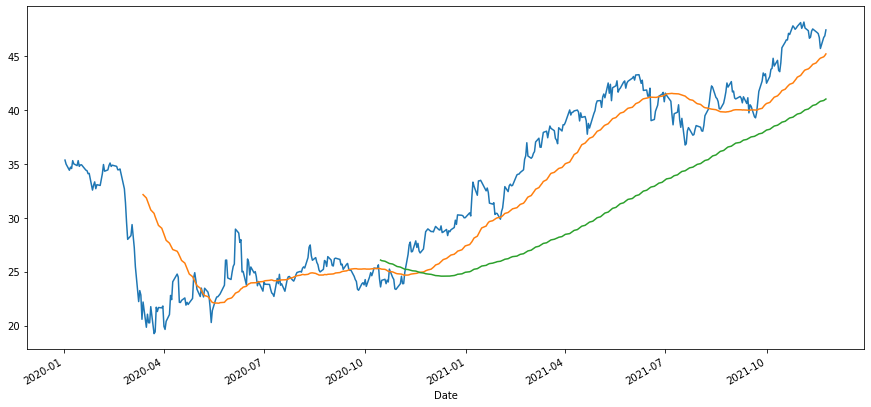

In [27]:
BankOfAmerica['MA50'] = BankOfAmerica['Open'].rolling(50).mean()
BankOfAmerica['MA200'] = BankOfAmerica['Open'].rolling(200).mean()
BankOfAmerica['Open'].plot(figsize = (15,7))
BankOfAmerica['MA50'].plot()
BankOfAmerica['MA200'].plot()

<AxesSubplot:xlabel='Date'>

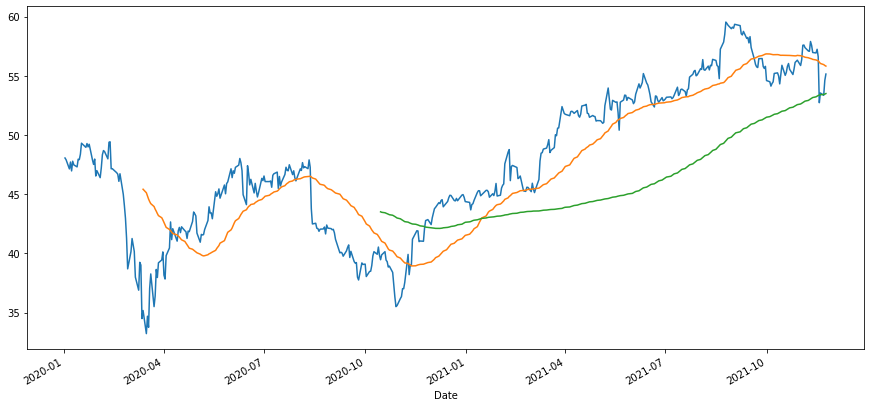

In [28]:
Cisco['MA50'] = Cisco['Open'].rolling(50).mean()
Cisco['MA200'] = Cisco['Open'].rolling(200).mean()
Cisco['Open'].plot(figsize = (15,7))
Cisco['MA50'].plot()
Cisco['MA200'].plot()

The stocks Bank of America, Cisco, and Anthem seem to be the ones that have the positive trends. I will be investing 10 shares for each of these stocks. I am also going to sell 5 shares of Microsoft due to the fact that over the past week it has been at an overall decline in the Total Gain/Loss section on my portfolio.

# Week 3

I am going to buy 10 shares each of the stocks Apple, Google, and S&P. I am also going to sell the last 5 of my stocks from microsoft.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

symbols = ['GOOGL', 'AAPL', 'SPGI']
start = '2015-01-01'
end = '2021-12-2'
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,GOOGL,AAPL,SPGI
Date,,,
2015-01-02,529.549988,24.745996,82.324539
2015-01-05,519.460022,24.048862,80.866730
2015-01-06,506.640015,24.051121,79.696754
2015-01-07,505.149994,24.388376,80.755302
2015-01-08,506.910004,25.325432,81.479546


In [15]:
df.describe()

,GOOGL,AAPL,SPGI
count,1742.000000,1742.000000,1742.000000
mean,1208.669690,58.549509,205.688424
std,573.929906,39.192113,106.210738
min,497.059998,21.036304,75.986481
25%,797.429993,28.664289,113.554190
50%,1085.229980,42.241642,182.870819
75%,1361.315002,73.423651,283.779930
max,2996.770020,165.300003,473.363434


Text(0, 0.5, 'Standard Deviations')

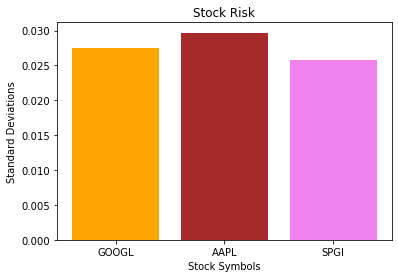

In [17]:
rets = df.pct_change(periods=3)
plt.bar(rets.columns, rets.std(), color=['orange', 'brown', 'violet'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

In [5]:
apple = yf.download('AAPL',start,end)
google = yf.download('GOOGL',start,end)
SP = yf.download('SPGI',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


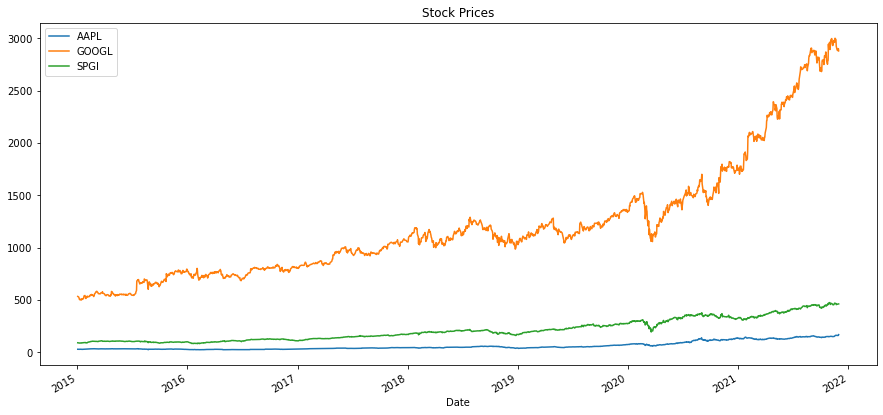

In [6]:
apple['Open'].plot(label = 'AAPL', figsize = (15,7))
google['Open'].plot(label = "GOOGL")
SP['Open'].plot(label = 'SPGI')

plt.title('Stock Prices')
plt.legend()

It seems that all three stocks have a low stock risk and their stock prices have been increasing over the years.